# Câu hỏi: **Sự thay đổi về số lượng và thể loại nội dung của Netflix qua các năm là gì?** #

**Lợi ích:**
- Giúp hiểu được xu hướng phát triển nội dung của Netflix trong việc bổ sung nội dung, cũng như cách họ ưu tiên các thể loại theo thời gian.
- Xác định xem liệu Netflix đang dần mở rộng hoặc thu hẹp chiến lược sản xuất nội dung theo thể loại và nếu có sự thay dổi rõ rệt nào trong việc lựa chọn thể loại.

**Cách làm:**
1. Tính tổng số lượng nội dung (Phim, TV Shows) được thêm vào Netflix theo từng năm (date_added).
2. Phân tích sự thay đổi về tỷ lệ giữa các thể loại (listed_in) qua các năm.
3. Vẽ biểu đồ thời gian để hiển thị số lượng nội dung theo từng thể loại qua các năm.
---

# Mục lục
* [A. Tiền xử lý](#part_a)
* [B. Phân tích](#part_b)
    * [1. Sự thay đổi về số lượng nội dung được thêm vào Netflix qua các năm](#chapter_1)
        * [1.1. Tổng số lượng nội dung qua các năm](#section_1_1)
        * [1.2. Tỷ lệ số lượng nội dung qua các năm](#section_1_2)
        * [1.3. Tiểu kết luận](#section_1_3)
    * [2. Sự thay đổi về thể loại nội dung qua các năm](#chapter_2)
        * [2.1. Xu hướng chung về thể loại qua các năm](#section_2_1)
        * [2.2. Xu hướng thay đổi của các nhóm thể loại nổi bật](#section_2_2)
        * [2.3. Tiểu kết luận](#section_2_3)
    * [3. Kết luận](#chapter_3)
---

### Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Đọc file vào dataframe

In [2]:
df = pd.read_csv('../data/netflix_titles_cleaned.csv')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,season,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",NaN,90.0
1,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,NaN
3,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,NaN
4,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,NaN


# A. Tiền xử lý <a id="part_a"></a>

Bỏ các cột không cần thiết cho câu hỏi để giảm chiều dữ liệu.

In [3]:
df = df.drop(columns=['director', 'cast', 'rating', 'description'])

One-Hot encoding cho cột `listed_in` để phân tích thể loại.

In [4]:

listed_in_encoded = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, listed_in_encoded], axis=1)
df = df.drop(columns='listed_in')
df.head()

,type,title,country,date_added,release_year,season,duration,Action,Action & Adventure,Anime Features,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,NaN,90.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,2.0,NaN,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,TV Show,Ganglands,UNKNOWN,2021-09-24,2021,1.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,Jailbirds New Orleans,UNKNOWN,2021-09-24,2021,1.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,India,2021-09-24,2021,2.0,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# B. Phân tích <a id="part_b"></a>

## 1. Sự thay đổi về số lượng nội dung được thêm vào Netflix qua các năm <a id="chapter_1"></a>

In [5]:
# Chuyển cột date_added sang định dạng datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Trích xuất năm từ cột date_added
df['year_added'] = df['date_added'].dt.year

# Đếm số lượng nội dung theo từng năm
content_by_year = df['year_added'].value_counts().sort_index()
content_by_year.index = content_by_year.index.astype('int')

# Vì chưa tổng kết năm 2024 nên ta tạm bỏ qua trong phần tính số lượng này
content_by_year = content_by_year.drop(2024)

content_by_year

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1648
2019    2014
2020    1879
2021    1498
Name: year_added, dtype: int64

### 1.1. Tổng số lượng nội dung qua các năm <a id="section_1_1"></a>

- Biểu đồ: barchart.
- Lý do chọn biểu đồ:
    - Các cột tạo cảm giác về số lượng sẽ phù hợp hơn.
    - Số lượng năm không quá nhiều nên vẫn dùng barchart được.
    - Dễ làm nổi bật được với cột có số lượng nhiều nhất.

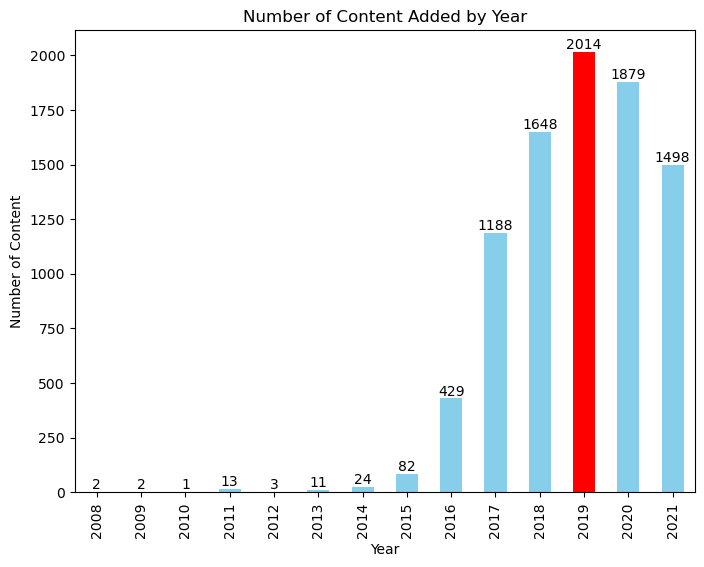

In [6]:
# Tìm năm có số lượng nội dung nhiều nhất
max_year = content_by_year.idxmax()

# Tạo danh sách màu: đỏ cho năm nhiều nhất, xanh cho các năm còn lại
colors = ['red' if year == max_year else 'skyblue' for year in content_by_year.index]

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
ax = content_by_year.plot(kind='bar', color=colors)
plt.title('Number of Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Content')

# Thêm số lượng trên các cột
for i, value in enumerate(content_by_year):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Nhận xét:**
- Số lượng nội dung qua các năm tăng dần và đạt đỉnh vào năm 2019 với 2014 nội dung, là con số khá lớn nhưng sau đó số lượng lại giảm dần.
- Vào những năm từ 2008 đến 2015, số lượng nội dung được thêm vào Netflix mỗi năm rất ít, chỉ dưới 100 nội dung. Điều này là do nền tảng stream phim chưa phổ biến nhiều, nên số lượng phim được thêm vào Netfilx còn rất ít.
- Từ năm 2016 đến 2019, số lượng nội dung tăng đáng kể, lên tới con số 429 và đạt đỉnh 2014 nội dung và năm 2019. Giai đoạn từ 2016 đến 2019 có thể được giải thích bởi việc Netflix tập trung đầu tư mạnh vào nội dung và mở rộng quy mô toàn cầu. Điều này dẫn đến số lượng nội dung tăng mạnh, đạt đỉnh vào năm 2019.
- Sau năm 2019, số lượng nội dung giảm dần chỉ còn 3/4 vào năm 2021. Sau năm 2019, sự sụt giảm có thể do tác động của đại dịch COVID-19, làm gián đoạn sản xuất nội dung, dẫn đến số lượng nội dung mới giảm đáng kể trong các năm sau.

### 1.2. Tỷ lệ số lượng nội dung qua các năm <a id="section_1_2"></a>

- Biều đồ: waterfall chart.
- Lý do chọn biểu đồ:
    - Thể hiện được rõ ràng số lượng tăng hay giảm qua các năm bằng vị trí của các cột.

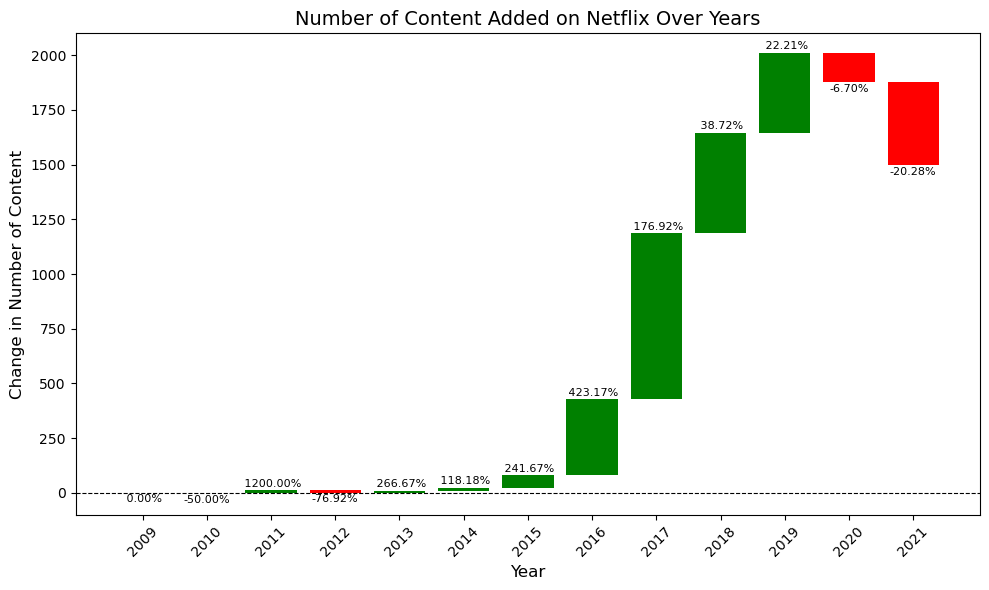

In [7]:
# Tính phần trăm thay đổi qua các năm
content_percentage_changes = content_by_year.pct_change() * 100
content_changes = content_by_year.diff()  # Tính thay đổi tuyệt đối

# Loại bỏ giá trị đầu tiên (NaN)
content_changes = content_changes.dropna()
content_percentage_changes = content_percentage_changes.dropna()

# Xác định màu sắc: xanh (tăng), đỏ (giảm)
colors = ['green' if change > 0 else 'red' for change in content_changes]

# Vẽ Waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
previous_value = 0  # Bắt đầu từ giá trị 0
years = content_changes.index

for i, (year, change) in enumerate(zip(years, content_changes)):
    # Vẽ cột
    ax.bar(year, change, bottom=previous_value, color=colors[i])

    # Hiển thị phần trăm thay đổi
    percentage = content_percentage_changes.iloc[i]
    text_y = previous_value + change + (30 if change>0 else -30)
    ax.text(year, text_y, f'{percentage: .2f}%', ha='center', va='center', fontsize=8, color='black')

    # Cập nhật giá trị đỉnh của cột trước đó
    previous_value += change

# Thêm nhãn và tiêu đề
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Đường ngang tại giá trị 0
ax.set_title('Number of Content Added on Netflix Over Years', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Change in Number of Content', fontsize=12)
ax.set_xticks(years)
plt.xticks(rotation=45)
plt.ylim(-100, 2100)
plt.tight_layout()

plt.show()

**Nhận xét:**
- Tỷ lệ tăng trưởng nội dung cao nhất là vào năm 2016 với mức tăng 423.17% so với năm trước dù tổng số lượng nội dung không đạt đỉnh như năm 2019. Tỷ lệ này không chỉ là bước nhảy vọt đáng kể mà còn cho thấy Netflix bắt đầu đầu tư mạnh mẽ vào việc mở rộng thư viện nội dung của mình để cạnh tranh với các nền tảng khác. Đây cũng là giai đoạn mà Netflix tập trung chuyển đổi từ mô hình phân phối DVD sang nền tảng phát trực tuyến.
- Mặc dù thời gian đầu có 2 lần giảm nhưng đa số phần trăm tăng trưởng nội dung cho tới năm 2017 đều rất lớn (trên 100%). Đây là giai đoạn Netflix tăng trưởng và bùng nổ về số lượng nội dung thêm vào mỗi năm, phản ánh sự tự tin trong việc thu hút và giữ chân người dùng thông qua thư viện phong phú hơn. Điều này cũng gắn liền với việc ra mắt một loạt nội dung gốc đình đám (như Stranger Things vào năm 2016).
- Sau đó phần trăm tăng trưởng giảm chỉ còn dưới 40% cho đến năm 2019 cho thấy Netflix đã đạt đến một ngưỡng nhất định về khả năng thêm mới nội dung mỗi năm. Netflix có lẽ đang dần chuyển hướng chiến lược, giảm tốc độ thêm nội dung mới.
- Vào những năm 2020, 2021, tỷ lệ thêm nội dung đã giảm nhẹ (-6.70% và -20.28%)không chỉ do ảnh hưởng của đại dịch Covid-19 mà còn phản ánh việc ngành công nghiệp sản xuất nội dung bị đình trệ. Nhiều dự án sản xuất phim bị hoãn hoặc hủy bỏ do các biện pháp phong tỏa. Tuy nhiên, Netflix vẫn duy trì khả năng cung cấp nội dung mới, nhờ thư viện nội dung đã được chuẩn bị trước đó và các chiến lược mua bản quyền từ bên thứ ba. Điều này giúp nền tảng không bị gián đoạn hoàn toàn, mặc dù tốc độ tăng trưởng giảm.

### 1.3. Tiểu kết luận <a id="section_1_3"></a>

Netflix trải qua 3 giai đoạn chính:
1. 2008-2015: Giai đoạn phát triển chậm
    - Số lượng nội dung tăng trưởng thấp, dưới 100 nội dung mỗi năm, phản ánh sự thử nghiệm và chuẩn bị cho chuyển đổi sang phát trực tuyến.
2. 2016-2019: Giai đoạn bùng nổ
    - Tỷ lệ tăng trưởng đạt đỉnh năm 2016 (+423.17%), số lượng nội dung đạt đỉnh năm 2019 (2014 nội dung). Đây là thời kỳ Netflix đầu tư mạnh mẽ vào nội dung và mở rộng toàn cầu.
3. 2020-2021: Giai đoạn suy giảm
    - Số lượng và tỷ lệ tăng trưởng giảm do đại dịch Covid-19 và điều chỉnh chiến lược tập trung vào chất lượng nội dung.

 Netflix từ phát triển chậm đã bùng nổ mạnh mẽ, sau đó điều chỉnh để thích ứng với thị trường và các yếu tố ngoại cảnh, duy trì vị thế qua chiến lược chất lượng.

## 2. Sự thay đổi về thể loại nội dung qua các năm <a id="chapter_2"></a>

In [8]:
# Lấy danh sách các thể loại
genres = listed_in_encoded.columns
print(genres)
print('Số lượng thể loại: ', genres.size)

Index(['Action', 'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Drama', 'Dramas',
       'Faith & Spirituality', 'Horror', 'Horror Movies', 'Independent Movies',
       'International Movies', 'International TV Shows', 'Kids' TV',
       'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals',
       'Reality TV', 'Romance', 'Romantic Movies', 'Romantic TV Shows',
       'Sci-Fi & Fantasy', 'Sci-fi', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thriller', 'Thrillers'],
      dtype='object')
Số lượng thể loại:  48


Vì có đến 48 thể loại sẽ gây phức tạp trong việc phân tích, có thể nhóm chúng lại thành các thể loại có đặc tính giống nhau để giảm độ phức tạp và nhìn rõ xu hướng chung hơn.

In [9]:
main_genre_lists = {
    'Action & Adventure': ['Action', 'Action & Adventure', 'TV Action & Adventure'],
    'Anime': ['Anime Features', 'Anime Series'],
    'Comedy': ['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'],
    'Crime & Mystery': ['Crime TV Shows', 'TV Mysteries'],
    'Drama': ['Drama', 'Dramas', 'TV Dramas'],
    'Documentary': ['Documentaries', 'Docuseries'],
    'Horror': ['Horror', 'Horror Movies', 'TV Horror'],
    'Romance': ['Romance', 'Romantic Movies', 'Romantic TV Shows'],
    'Sci-Fi & Fantasy': ['Sci-Fi & Fantasy', 'Sci-fi', 'TV Sci-Fi & Fantasy'],
    'Reality': ['Reality TV'],
    'Kids & Family': ['Kids\' TV', 'Children & Family Movies'],
    'Teen': ['Teen TV Shows'],
    'Independent': ['Independent Movies'],
    'Classic': ['Classic Movies', 'Cult Movies', 'Classic & Cult TV'],
    'LGBTQ': ['LGBTQ Movies'],
    'International': ['International Movies', 'International TV Shows', 'Spanish-Language TV Shows'],
    'Science & Nature': ['Science & Nature TV'],
    'Faith & Spirituality': ['Faith & Spirituality'],
    'Music & Musicals': ['Music & Musicals'],
    'Thriller': ['Thriller', 'Thrillers', 'TV Thrillers'],
    'Sports': ['Sports Movies'],
    'General': ['Movies', 'TV Shows']
}


### 2.1. Xu hướng chung về thể loại qua các năm <a id="section_2_1"></a>

- Biểu đồ sử dụng: heatmap.
- Lý do chọn biểu đồ:
    - Vì có 22 nhóm thể loại, nếu vẽ bằng line chart, hay area chart sẽ không đủ màu, và khó phân biệt được đường hay diện tích nào là của nhóm nào do các đường hay diện tích nằm chồng chéo lên nhau.
    - Với heatmap chỉ cần ít màu và các nhóm được chia thành các hàng riêng biệt, chỉ cần dựa theo hàng và độ đậm nhạt tại mỗi năm thì có thể biết được độ lớn của số lượng nội dung.

In [10]:
# Tạo danh sách các cột (thể loại cụ thể) từ one-hot encoding
genre_columns = df.columns.difference(['date_added', 'year_added'])

# Tổng hợp số lượng nội dung theo nhóm thể loại chính
genre_trends = {}
for main_genre, specific_genres in main_genre_lists.items():
    relevant_columns = [col for col in genre_columns if col in specific_genres]
    if relevant_columns:  # Chỉ tính nếu có các cột phù hợp
        genre_trends[main_genre] = df.groupby('year_added')[relevant_columns].sum().sum(axis=1)

# Chuyển thành DataFrame để dễ vẽ biểu đồ
genre_trends_df = pd.DataFrame(genre_trends)


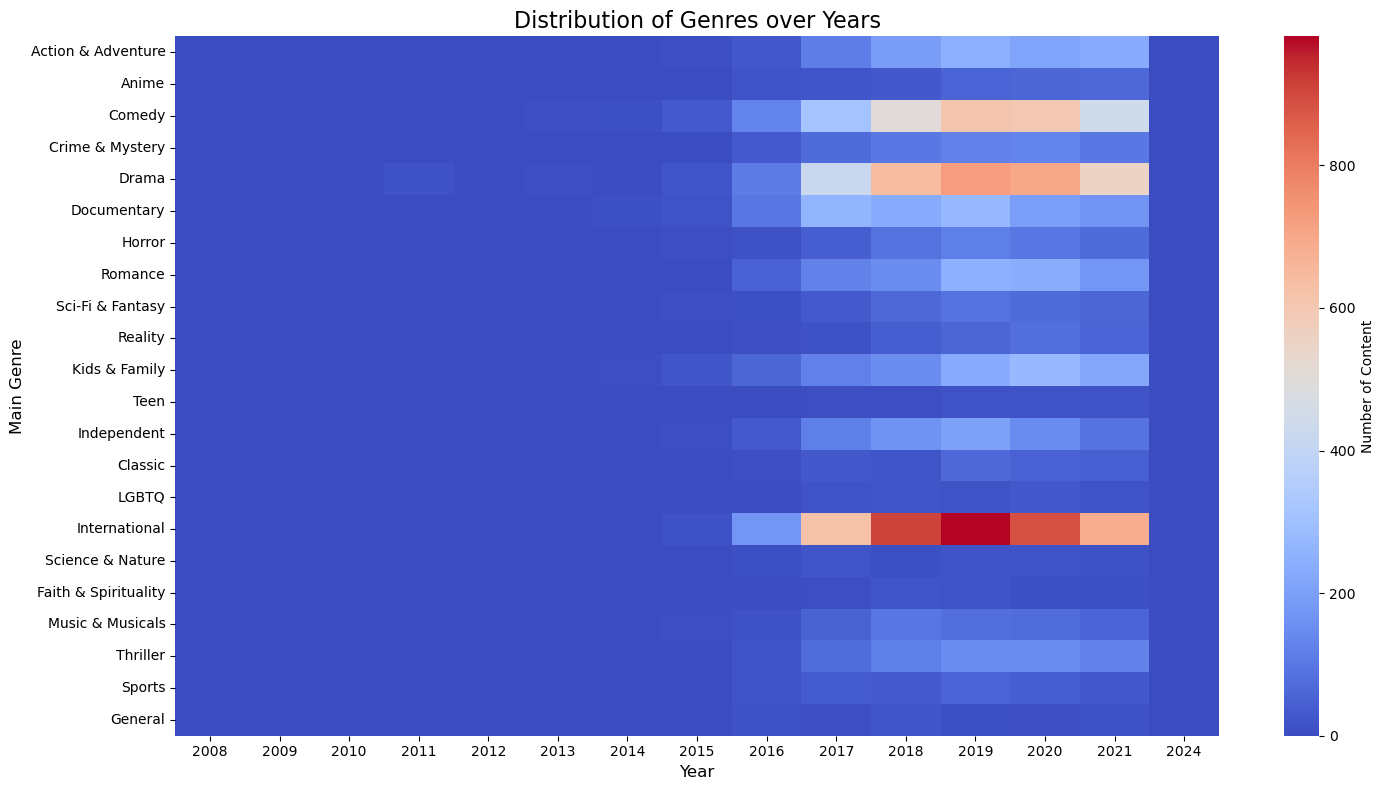

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(genre_trends_df.T, cmap='coolwarm', annot=False, fmt='d', cbar_kws={'label': 'Number of Content'})
plt.title('Distribution of Genres over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Main Genre', fontsize=12)
plt.tight_layout()
plt.show()


**Nhận xét:**
- Giai đoạn 2008 - 2015:
    - Màu của đa số các thể loại là xanh đậm, điều này cho thấy số lượng của các thể loại mỗi năm là rất thấp, tiệm cận 0. Số lượng nội dung thấp có thể liên quan đến việc Netflix mới bắt đầu mở rộng danh mục nội dung của mình từ các bộ phim và chương trình cũ, thay vì sản xuất hoặc mua nội dung gốc số lượng lớn.
    - Có 1 vài thể loại có màu sắc nhạt hơn như Drama (2011, 2013, 2015), Comedy (2013-2015), Documentary (2014, 2015), Horror (2015), Sci-Fi & Fantasy (2015), Kids & Family (2015), Independent (2015), International (2015), Music & Musicals (2015). Những thể loại tăng nhẹ (Drama, Comedy, Documentary) phản ánh thị hiếu khán giả thời kỳ đầu khi dịch vụ chủ yếu cung cấp nội dung phổ biến và ít tập trung vào thị trường ngách.
- Giai đoạn 2016 - 2019:
    - Có 1 vài thể loại tăng dần sắc cam thể hiện cho số lượng tăng cao (trên 600 nội dung) như Comedy, Drama, International và cao nhất là International với màu đỏ (khoảng 900 nội dung) vào năm 2019 là International. Sự tăng mạnh của thể loại International có thể giải thích bởi chiến lược toàn cầu hóa của Netflix, mua bản quyền và sản xuất nội dung địa phương tại nhiều quốc gia. Các thể loại như Comedy và Drama tăng cao có thể liên quan đến xu hướng phổ biến và khả năng tiếp cận rộng rãi của hai thể loại này.
    - Có những thể loại tăng ít hơn các loại trên, màu sắc chuyển sang xanh nhạt (trên dưới 400 nội dung) như Action & Adventure, Documentary, Romance, Kids & Family, Independent, Thriller. Có thể do đây là thị trường nhỏ hơn hoặc ít được đầu tư sản xuất nội dung.
    - Có những thể loại hầu như không tăng hoặc tăng rất ít, mang màu xanh đậm như Teen, LGBTQ, Scienc & Nature, Faith & Spirituality, General.
- Giai đoạn 2020 - 2021: 
    - Đa số các thể loại đều giảm số lượng nội dung nhưng không giảm quá sâu, màu sắc không thay đổi hoàn toàn mà chỉ nhạt đi. Sự sụt giảm nhẹ về số lượng nội dung có thể liên quan đến đại dịch COVID-19, khi việc sản xuất nội dung bị đình trệ. Tuy nhiên, sự giảm không quá sâu cho thấy Netflix vẫn duy trì khả năng sản xuất và mua nội dung trong giai đoạn khó khăn.
    
- Suy ra chiến lược nội dung của Netflix:
    - Netflix có xu hướng tập trung vào các thể loại có sức hút rộng rãi (Comedy, Drama, International) và giảm tập trung vào các thể loại ngách hoặc ít phổ biến hơn (Teen, Faith & Spirituality, Science & Nature).Tăng mạnh nội dung International trong giai đoạn 2016–2019 có thể là chiến lược để cạnh tranh với các nền tảng khác và mở rộng thị trường quốc tế.

### 2.2. Xu hướng thay đổi của các nhóm thể loại nổi bật <a id="section_2_2"></a>

Từ phần trước, khi xem xét các giai đoạn, nhóm nhận thấy rằng sẽ có những nhóm thể loại có sự tăng trưởng rõ rệt, nhóm sẽ đi sâu vào phân tích sự thay đổi cơ cấu của các thể loại trong nhóm đó để nhận biết xư hướng thay đổi của thể loại.

- Biểu đồ sử dụng: stacked area chart.
- Lý do: 
    - Cần so sánh phần trăm tỷ lệ giữa các thể loại trong nhóm
    - Có thể dùng với nhiều mốc thời gian

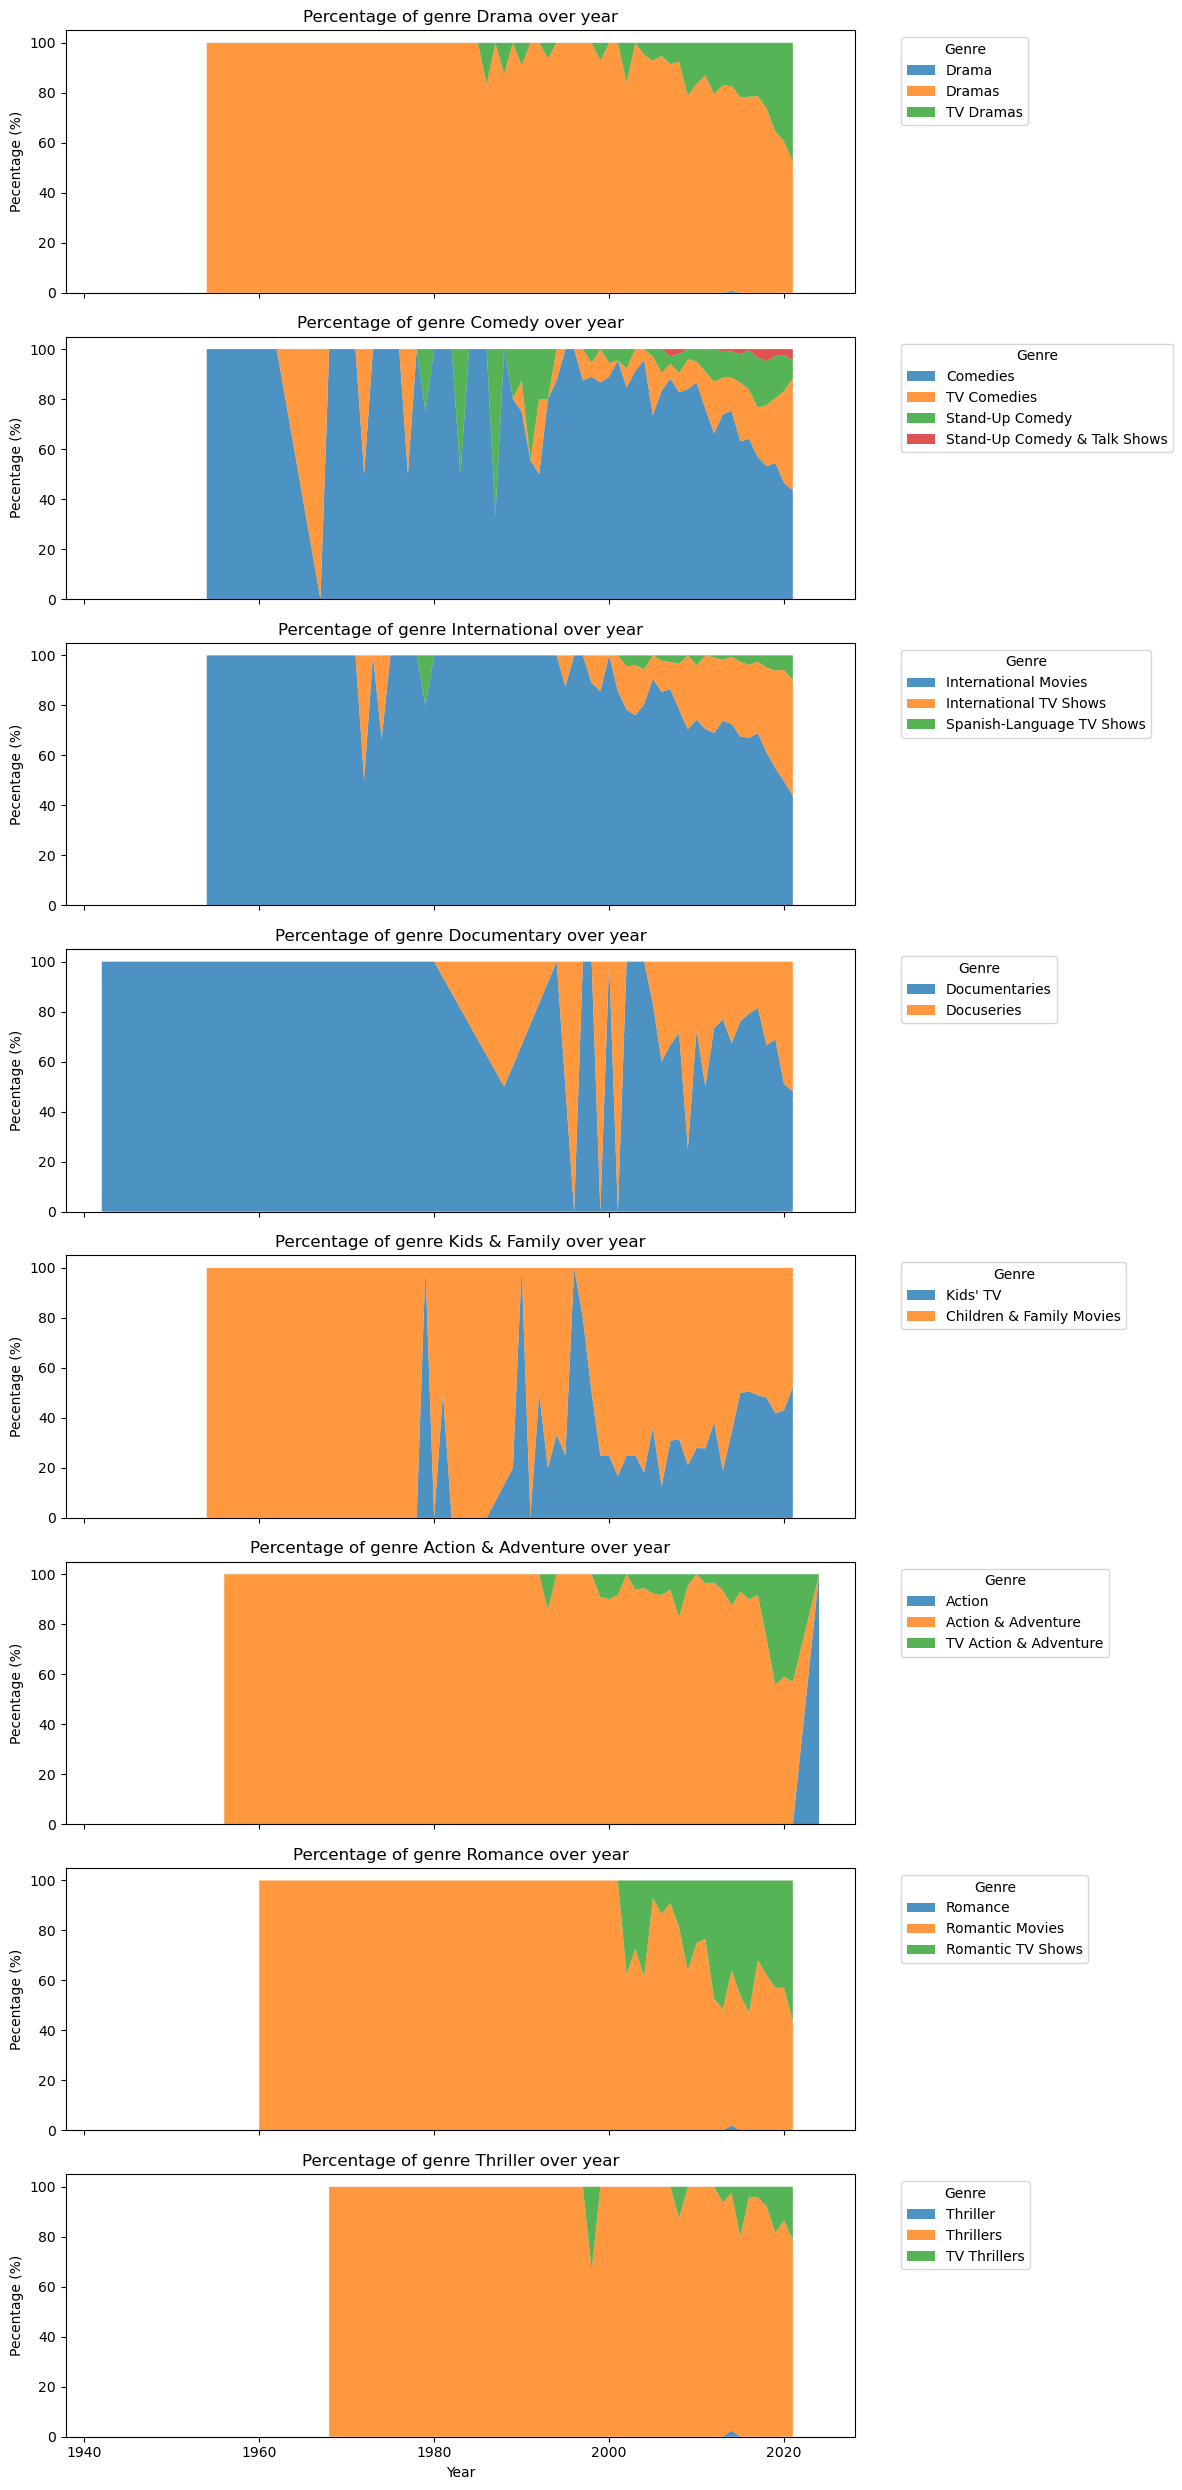

In [29]:
# Danh sách các thể loại nổi bật
highlighted_genres = ['Drama', 'Comedy', 'International', 'Documentary', 'Kids & Family', 'Action & Adventure', 'Romance', 'Thriller']

# Tính số lượng và phần trăm cho từng nhóm thể loại
group_percentages = {}

for group, genres in main_genre_lists.items():
    if group in highlighted_genres:
        # Tính tổng số nội dung mỗi thể loại theo năm
        genre_counts = {}
        for genre in genres:
            if genre in df.columns:  # Đảm bảo thể loại có trong dữ liệu
                genre_counts[genre] = df[df[genre] == 1].groupby('release_year').size()
        
        # Gộp dữ liệu thành DataFrame
        genre_counts_df = pd.DataFrame(genre_counts).fillna(0)
        
        # Tính tổng số nội dung mỗi năm
        total_counts = genre_counts_df.sum(axis=1)
        
        # Tính phần trăm mỗi thể loại
        genre_percentages = genre_counts_df.div(total_counts, axis=0) * 100
        
        # Lưu dữ liệu
        group_percentages[group] = genre_percentages

# Vẽ biểu đồ stacked area chart cho từng nhóm
fig, axs = plt.subplots(len(highlighted_genres), 1, figsize=(12, 25), sharex=True)

for ax, group in zip(axs, highlighted_genres):
    if group in group_percentages:
        data = group_percentages[group]
        ax.stackplot(data.index, data.T, labels=data.columns, alpha=0.8)
        ax.set_title(f"Percentage of genre {group} over year")
        ax.set_ylabel("Pecentage (%)")
        ax.legend(title="Genre", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.xlabel("Year")
plt.tight_layout()
plt.show()


**Nhận xét:**
1. Drama
    - Các thể loại con của Drama như Dramas và TV Dramas bắt đầu chiếm ưu thế từ khoảng năm 2000, đặc biệt là TV Dramas. Drama dần giảm tỷ lệ đóng góp, nhường chỗ cho các thể loại cụ thể hơn.
    - Drama truyền thống suy giảm khi các chương trình truyền hình trở nên phổ biến hơn.
2. Comedy
    - TV Comedies dần chiếm ưu thế, đặc biệt là từ những năm 2010, trong khi Comedies (phim hài truyền thống) giảm dần.
    - Hài kịch truyền hình đang tăng trưởng mạnh mẽ, cho thấy sự dịch chuyển từ phim hài truyền thống sang các chương trình truyền hình.
3. International
    - International Movies vẫn giữ phần lớn tỷ lệ trong nhiều năm, nhưng International TV Shows bắt đầu tăng trưởng mạnh từ những năm 2000.
    - Nội dung truyền hình quốc tế tăng mạnh, phản ánh sự đa dạng hóa và phát triển của thị trường toàn cầu.
4. Documentary
    - Docuseries bắt đầu tăng trưởng rõ rệt từ khoảng năm 2010, trong khi Documentaries vẫn duy trì tỷ lệ cao hơn nhưng có xu hướng giảm nhẹ.
    - Phim tài liệu dài tập đang dần thay thế các phim tài liệu truyền thống, cho thấy nhu cầu người xem thay đổi.
5. Kid & Family
    - Children & Family Movies chiếm tỷ lệ lớn trong nhiều năm, nhưng Kids' TV bắt đầu tăng lên từ năm 2000.
    - : Nội dung truyền hình cho trẻ em trở nên phổ biến hơn khi các nền tảng phát trực tuyến mở rộng.
6. Action & Adventure
    - Action & Adventure là thể loại con chiếm ưu thế từ năm 2000, trong khi Action (phim hành động thuần túy) giảm dần.
    - Thể loại hành động truyền thống dần bị thay thế bởi các nội dung kết hợp yếu tố phiêu lưu.
7. Romance
    -  Romantic Movies luôn chiếm tỷ lệ cao nhưng có sự suy giảm nhẹ sau năm 2000. Romantic TV Shows tăng nhẹ, nhưng không đáng kể.
    - Phim tình cảm vẫn là nội dung chủ đạo, nhưng chương trình truyền hình liên quan vẫn chưa có sự bùng nổ đáng kể.
8. Thriller
    -  Thrillers vẫn duy trì tỷ lệ cao trong suốt các năm, trong khi TV Thrillers bắt đầu tăng nhẹ từ những năm 2010.
    - Thể loại hồi hộp truyền thống vẫn giữ được sức hút, nhưng có dấu hiệu chuyển dịch sang truyền hình.

Suy ra:
- Một xu hướng rõ ràng là sự chuyển dịch từ các bộ phim truyền thống (Movies) sang nội dung truyền hình (TV Shows). Nguyên nhân chính bao gồm sự phát triển mạnh mẽ của các nền tảng streaming như Netflix, Amazon Prime, và Disney+, vốn đầu tư lớn vào các series truyền hình để thu hút và giữ chân người dùng. Thói quen xem của khán giả cũng thay đổi, khi họ ngày càng ưu tiên sự linh hoạt và thích xem các series dài tập với nội dung phong phú, thay vì các phim lẻ. Ngoài ra, về mặt kinh tế, việc sản xuất các series dài tập thường mang lại lợi nhuận cao hơn, vì có thể kéo dài qua nhiều mùa, tối ưu hóa chi phí. Kết quả là các thể loại như TV Dramas và TV Comedies phát triển mạnh mẽ, trong khi phim truyền thống giảm dần sức hút trên các nền tảng trực tuyến.
- Nội dung quốc tế đã trở thành một xu hướng nổi bật trong những năm gần đây, với sự tăng trưởng của các thể loại như International Movies và International TV Shows. Điều này có thể được giải thích bởi sự toàn cầu hóa và sự phát triển công nghệ, khi các nền tảng streaming mở rộng phạm vi tiếp cận đến khán giả trên toàn thế giới. Người xem ngày càng yêu thích các câu chuyện từ nhiều nền văn hóa khác nhau, thúc đẩy sự đa dạng trong nội dung. Ngoài ra, việc sản xuất nội dung ở các quốc gia có chi phí thấp hơn, như Ấn Độ và Hàn Quốc, cũng giúp mở rộng nguồn cung. Kết quả là các nội dung như phim Hàn (K-Dramas), phim Tây Ban Nha và Bollywood trở nên phổ biến, mang lại sức sáng tạo mới cho ngành công nghiệp giải trí.
- Các thể loại như Documentaries (phim tài liệu) đã có sự thay đổi trong cách kể chuyện, khi các dạng nội dung dài tập như Docuseries phát triển mạnh mẽ. Điều này phản ánh nhu cầu ngày càng tăng của khán giả về nội dung sâu sắc và trải nghiệm mới mẻ. Các công cụ sản xuất hiện đại cũng hỗ trợ tạo ra những chương trình tài liệu hấp dẫn hơn. Docuseries đặc biệt thu hút vì nó kết hợp được yếu tố thông tin và giải trí trong một định dạng dài tập, giúp khán giả có thời gian kết nối cảm xúc với câu chuyện. Đây là minh chứng cho việc các nền tảng luôn đổi mới để đáp ứng sở thích đa dạng của người xem.
- Nội dung dành cho trẻ em và gia đình đã chứng kiến sự tăng trưởng đáng kể, với các thể loại như Kids' TV và Children & Family Movies trở thành một phần quan trọng trong danh mục nội dung. Điều này có thể giải thích bởi các nền tảng streaming đang tập trung vào nhóm khán giả gia đình, vốn là một nhóm ổn định và lâu dài. Nội dung dành cho trẻ em cũng dễ dàng tiếp cận hơn qua các dịch vụ trực tuyến, không còn bị giới hạn ở truyền hình truyền thống hay rạp chiếu phim. Đại dịch COVID-19 cũng là một yếu tố thúc đẩy sự gia tăng tiêu thụ nội dung trẻ em, khi các gia đình dành nhiều thời gian ở nhà.
- Cạnh tranh giữa các nền tảng streaming như Netflix, Disney+, và Amazon Prime đã thúc đẩy sự đổi mới liên tục trong sản xuất nội dung. Netflix, chẳng hạn, tập trung mạnh vào nội dung quốc tế và dài tập để thu hút lượng lớn người xem trên toàn cầu. Trong khi đó, Disney+ ưu tiên nội dung gia đình và trẻ em để giữ chân các gia đình. Sự cạnh tranh này đã thúc đẩy các thể loại như Romantic TV Shows, Action & Adventure, và Thrillers, mang đến những sản phẩm đa dạng và sáng tạo để phù hợp với nhiều đối tượng khán giả.

### 2.3. Tiểu kết luận <a id="section_2_3"></a>

Từ những nhận xét trên có thể rút ra xu hướng thay đổi của thể loại:
1. Chuyển dịch từ phim truyền thống sang nội dung truyền hình
- Xu hướng rõ ràng: Các thể loại phim truyền thống (Movies) như Comedy, Drama, và Action dần nhường chỗ cho các chương trình truyền hình (TV Shows) tương ứng như TV Dramas, TV Comedies, và TV Thrillers.
- Nguyên nhân:
    - Sự phát triển của các nền tảng streaming thúc đẩy việc sản xuất và tiêu thụ nội dung dài tập.
    - Người xem ưu tiên tính linh hoạt và khả năng kết nối cảm xúc với các series dài hơi hơn là các bộ phim lẻ.
    - Lợi ích kinh tế: Series truyền hình mang lại cơ hội tối ưu hóa lợi nhuận do có thể kéo dài nhiều mùa.
- Kết quả: TV Dramas và TV Comedies phát triển mạnh mẽ, trong khi các bộ phim lẻ truyền thống suy giảm sức hút.
2. Sự tăng trưởng của nội dung quốc tế
- Tăng trưởng đáng chú ý: Thể loại International (International Movies và International TV Shows) đã tăng mạnh từ giai đoạn 2016–2019, đặc biệt là nội dung truyền hình quốc tế.
- Nguyên nhân:
    - Chiến lược toàn cầu hóa của các nền tảng như Netflix, đầu tư vào nội dung địa phương tại nhiều quốc gia.
    - Khán giả ngày càng yêu thích các câu chuyện từ nhiều nền văn hóa khác nhau.
    - Sản xuất nội dung ở các quốc gia có chi phí thấp hơn, như Hàn Quốc và Ấn Độ, giúp mở rộng nguồn cung.
- Kết quả: Các thể loại như K-Dramas, phim Tây Ban Nha, và Bollywood trở nên phổ biến, phản ánh sự đa dạng hóa và sáng tạo trong nội dung.
3. Thay đổi trong cách kể chuyện và định dạng nội dung
- Nội dung tài liệu: 
    - Phim tài liệu truyền thống (Documentaries) giảm tỷ lệ, nhường chỗ cho các chương trình tài liệu dài tập (Docuseries).
    - Nguyên nhân: Khán giả yêu thích các câu chuyện sâu sắc, có thời gian kết nối cảm xúc với nhân vật hoặc nội dung.
    - Kết quả: Docuseries trở thành định dạng phổ biến hơn, kết hợp yếu tố giải trí và thông tin.
- Hành động và phiêu lưu:
    - Nội dung hành động truyền thống (Action Movies) giảm, trong khi nội dung kết hợp yếu tố phiêu lưu (Action & Adventure) tăng trưởng.
    - Kết quả: Các nội dung đa dạng hơn, đáp ứng nhiều sở thích khán giả.
4. Nội dung trẻ em và gia đình tăng trưởng ổn định
- Xu hướng nổi bật:
    - Nội dung trẻ em và gia đình (Kids' TV và Children & Family Movies) tăng trưởng đáng kể.
    - Nguyên nhân: Các nền tảng streaming như Netflix tập trung vào nhóm khán giả gia đình, đặc biệt trong giai đoạn đại dịch COVID-19.
    - Kết quả: Các chương trình truyền hình dành cho trẻ em dần chiếm ưu thế so với phim lẻ truyền thống.
5. Sự cạnh tranh giữa các nền tảng thúc đẩy đổi mới
- Chiến lược cạnh tranh:
    - Netflix tập trung vào nội dung quốc tế và dài tập để chiếm lĩnh thị trường toàn cầu.
    - Disney+ chú trọng nội dung gia đình và trẻ em.
- Kết quả: Các thể loại như Romantic TV Shows, Action & Adventure, và Thrillers trở nên phong phú hơn, phục vụ nhiều đối tượng khán giả khác nhau.

## 3. Kết luận <a id="chapter_3"></a>

Netflix đã trải qua những thay đổi lớn trong cả số lượng và thể loại nội dung, phản ánh sự phát triển và thích nghi chiến lược để dẫn đầu thị trường streaming toàn cầu.

1. Về số lượng nội dung:
Netflix khởi đầu với giai đoạn phát triển chậm, tập trung thử nghiệm và chuẩn bị. Sau đó, từ năm 2016 đến 2019, số lượng nội dung bùng nổ nhờ sự đầu tư mạnh mẽ và mở rộng toàn cầu. Tuy nhiên, từ 2020, số lượng nội dung giảm do tác động của đại dịch COVID-19 và sự chuyển đổi chiến lược tập trung vào chất lượng thay vì số lượng. Điều này cho thấy Netflix đã trưởng thành hơn, ưu tiên nội dung có giá trị cao để duy trì vị thế cạnh tranh.

2. Về thể loại nội dung:
Netflix không ngừng đổi mới để đáp ứng sở thích đa dạng của khán giả:
- Chuyển dịch từ phim truyền thống sang nội dung truyền hình: Nội dung truyền hình dài tập (TV Shows) chiếm ưu thế, thay thế phim truyền thống nhờ khả năng tạo sự kết nối lâu dài với khán giả và tối ưu hóa lợi nhuận.
- Tăng trưởng của nội dung quốc tế: Netflix đầu tư mạnh vào các thể loại quốc tế như K-Dramas, Bollywood, và phim Tây Ban Nha, mở rộng sức hấp dẫn toàn cầu và thúc đẩy sự đa dạng hóa văn hóa.
- Thay đổi cách kể chuyện và định dạng nội dung: Nội dung như Docuseries và Action & Adventure tăng trưởng, phản ánh nhu cầu của khán giả đối với sự sâu sắc và đa dạng.
- Tập trung vào nội dung trẻ em và gia đình: Netflix củng cố vị thế trong nhóm khán giả gia đình, đặc biệt trong giai đoạn đại dịch.

Nhìn chung, Netflix đã chuyển mình từ một nền tảng thử nghiệm nhỏ thành một nhà sản xuất nội dung hàng đầu thế giới. Sự thành công của Netflix đến từ việc nhạy bén với xu hướng, đầu tư vào nội dung phù hợp, và tối ưu hóa chiến lược để duy trì sức hút đối với khán giả toàn cầu.